*Item based collaboartaive filtering Recommendation Engine*

In [1]:
#importing the packages

In [2]:
import pandas as pd
import numpy as np

Data preparation and Exploring

In [3]:
df=pd.read_csv("book datav4.csv",index_col=0)
df.head(5)

,book genre,user id,user rating,user age
book name,,,,
Blue Blood,history,101,7,25
Naive,drama,101,6,25
Freedom,poetry,102,8,33
Blue Blood,history,102,6,33
balckburn yard,detective,103,9,27


In [4]:
#descriptive statistics
df.describe()


,user id,user rating,user age
count,199.000000,199.000000,199.000000
mean,148.668342,6.994975,26.879397
std,29.609078,1.412418,2.660130
min,101.000000,3.000000,22.000000
25%,123.500000,6.000000,25.000000
50%,149.000000,7.000000,26.000000
75%,176.000000,8.000000,28.000000
max,200.000000,10.000000,34.000000


In [6]:
#mean rating of each book
rating=pd.DataFrame(df.groupby('book name')['user rating'].mean())
rating.head(10)

,user rating
book name,
Blue Blood,6.888889
Freedom,7.111111
Heaven,6.416667
Murder valley,6.000000
Naive,5.400000
balckburn yard,8.384615
battle,7.437500
count it,7.666667
divide,7.625000


In [7]:
#Number of Rating per book
rating['count of rating']=df.groupby('book name')['user rating'].count()
rating.head(25)

,user rating,count of rating
book name,,
Blue Blood,6.888889,9
Freedom,7.111111,9
Heaven,6.416667,12
Murder valley,6.000000,1
Naive,5.400000,5
balckburn yard,8.384615,13
battle,7.437500,16
count it,7.666667,6
divide,7.625000,8


In [8]:
# Finding Most Rated books
rating.sort_values('count of rating',ascending=False).head(25)

,user rating,count of rating
book name,,
battle,7.437500,16
mystic,7.571429,14
balckburn yard,8.384615,13
Heaven,6.416667,12
titanic,5.700000,10
ghost,6.000000,10
Blue Blood,6.888889,9
the wall,4.888889,9
Freedom,7.111111,9


In [9]:
#Sum of Rating for each book 
rating['sum of rating']=df.groupby('book name')['user rating'].sum()
rating.head(25)

,user rating,count of rating,sum of rating
book name,,,
Blue Blood,6.888889,9,62
Freedom,7.111111,9,64
Heaven,6.416667,12,77
Murder valley,6.000000,1,6
Naive,5.400000,5,27
balckburn yard,8.384615,13,109
battle,7.437500,16,119
count it,7.666667,6,46
divide,7.625000,8,61


In [10]:
#Sorting the highest sum of ratingf of the books
rating.sort_values('sum of rating',ascending=False).head(25)

,user rating,count of rating,sum of rating
book name,,,
battle,7.437500,16,119
balckburn yard,8.384615,13,109
mystic,7.571429,14,106
Heaven,6.416667,12,77
mars,8.250000,8,66
Freedom,7.111111,9,64
utility,9.000000,7,63
Blue Blood,6.888889,9,62
divide,7.625000,8,61


In [11]:
#plotting import

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

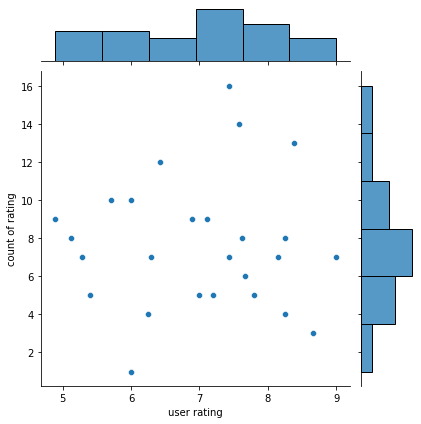

In [12]:
#plotting rating
sns.jointplot(x='user rating',y='count of rating',data=rating)

In [13]:
#rating of books by each user using pivot
df_rating=df.pivot_table(index=['user id'],columns=['book name'],values='user rating')
df_rating.head(20)

book name,Blue Blood,Freedom,Heaven,Murder valley,Naive,balckburn yard,battle,count it,divide,experiment,...,murder valley,mystic,negative,punishment,rhythm,soil,the wall,titanic,utility,war
user id,,,,,,,,,,,,,,,,,,,,,
101,7.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,6.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,9.0,8.0,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
105,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,8.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#observing rating of book 'battle' by user
battlerating = df_rating['battle']
battlerating

user id
101    NaN
102    NaN
103    8.0
104    NaN
105    NaN
      ... 
196    NaN
197    7.0
198    NaN
199    NaN
200    NaN
Name: battle, Length: 100, dtype: float64

In [15]:
#finding rating correlation of book "battle" with other books
recommend_battle_readers=df_rating.corrwith(battlerating)
recommend_battle_readers.head(10)

C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\user\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


book name
Blue Blood             NaN
Freedom                NaN
Heaven            0.583333
Murder valley          NaN
Naive                  NaN
balckburn yard    0.428571
battle            1.000000
count it               NaN
divide            0.000000
experiment             NaN
dtype: float64

In [20]:
#dataframe for number of rating

corr_battle=pd.DataFrame(recommend_battle_readers,columns=["correlation"])
corr_battle.dropna(inplace=True)
corr_battle.head()

,correlation
book name,
Heaven,0.583333
balckburn yard,0.428571
battle,1.000000
divide,0.000000
mystic,-0.043980


In [21]:
#finding out the total value of rating of the correlated books
corr_battle=corr_battle.join(rating['sum of rating'])


In [22]:
corr_battle.head(25)

,correlation,sum of rating
book name,,
Heaven,0.583333,77
balckburn yard,0.428571,109
battle,1.000000,119
divide,0.000000,61
mystic,-0.043980,106


In [23]:
#Choosing books that have more than 70 sum of rating
corr_battle[corr_battle['sum of rating']>70].sort_values(by='correlation',ascending=False).head()

,correlation,sum of rating
book name,,
battle,1.000000,119
Heaven,0.583333,77
balckburn yard,0.428571,109
mystic,-0.043980,106


In [24]:
#Choosing books that have more than .40 rating
corr_battle[corr_battle['correlation']>.40].sort_values(by='correlation',ascending=False).head()

,correlation,sum of rating
book name,,
battle,1.000000,119
Heaven,0.583333,77
balckburn yard,0.428571,109


In [25]:
#So, book "Heaven" and "balckburn yard" could be recommended for "Battle" readers